<a href="https://colab.research.google.com/github/bhushanmandava/Time-Series/blob/main/Phrophet_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import ParameterGrid

In [3]:
df = pd.read_csv('Daily Bike Sharing training.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df = df.rename(columns={'cnt': 'y',
                         'dteday':'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df['ds'] = pd.to_datetime(df['ds'],format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
#create dummies for our catogorical important variable
weather_sit = pd.get_dummies(df['weathersit'],drop_first=True)
df= pd.concat([df,weather_sit],axis=1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [12]:
df = df.rename(columns ={2:'weather_2',3:'weather_3'})
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weather_2,weather_3


In [13]:
df.drop(columns=['instant','season','yr','mnth','weekday','casual','registered'],inplace=True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weather_2,weather_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [15]:
df.corr()


,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weather_2,weather_3
ds,1.000000,0.015117,-0.001623,-0.057854,0.237163,0.239176,-0.009407,-0.123133,0.706355,-0.046198,-0.029047
holiday,0.015117,1.000000,-0.252561,-0.042729,-0.027242,-0.031453,-0.020553,0.008972,-0.058080,-0.028507,-0.029369
workingday,-0.001623,-0.252561,1.000000,0.062988,0.051368,0.050852,0.031885,-0.024576,0.048162,0.055653,0.024072
weathersit,-0.057854,-0.042729,0.062988,1.000000,-0.104772,-0.105342,0.590193,0.044297,-0.288684,0.792560,0.510492
temp,0.237163,-0.027242,0.051368,-0.104772,1.000000,0.991531,0.141174,-0.164458,0.631649,-0.081187,-0.056095
atemp,0.239176,-0.031453,0.050852,-0.105342,0.991531,1.000000,0.152682,-0.187429,0.633885,-0.078131,-0.061334
hum,-0.009407,-0.020553,0.031885,0.590193,0.141174,0.152682,1.000000,-0.235741,-0.101409,0.489191,0.271073
windspeed,-0.123133,0.008972,-0.024576,0.044297,-0.164458,-0.187429,-0.235741,1.000000,-0.234871,-0.026734,0.109817
y,0.706355,-0.058080,0.048162,-0.288684,0.631649,0.633885,-0.101409,-0.234871,1.000000,-0.166746,-0.234874
weather_2,-0.046198,-0.028507,0.055653,0.792560,-0.081187,-0.078131,0.489191,-0.026734,-0.166746,1.000000,-0.119755


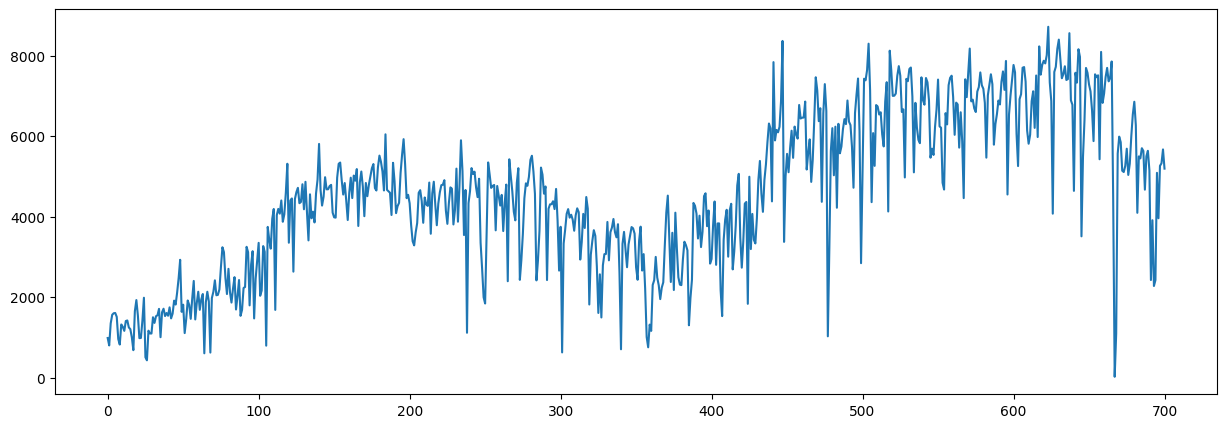

In [17]:
df['y'].plot(figsize=(15,5))
plt.show()

In [18]:
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [19]:
df_temp = df.copy()
df_temp.set_index('ds',inplace=True)

In [20]:
df_temp.index.freq="D"#setting freuency dialy
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

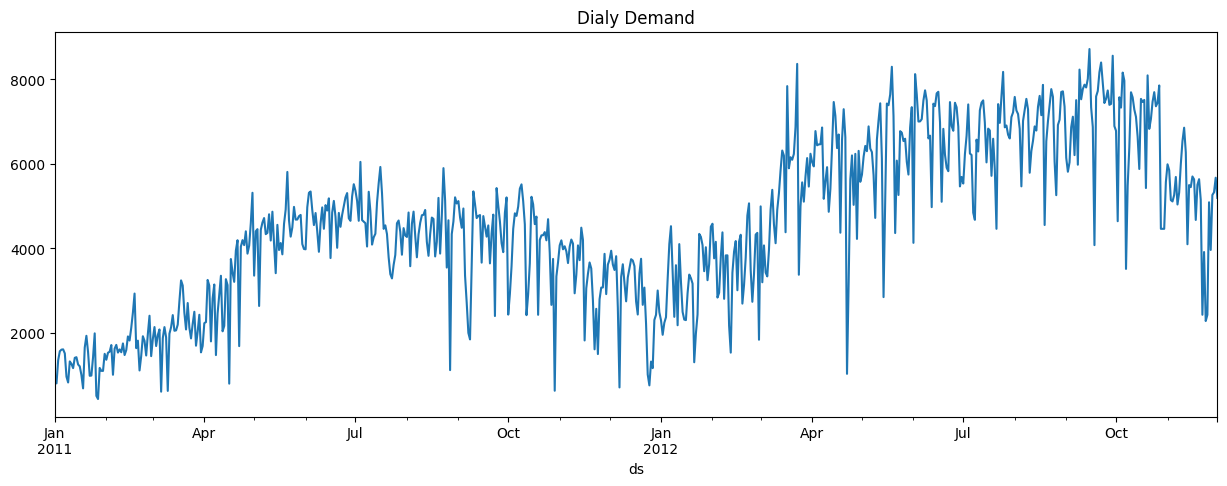

In [21]:
df_temp['y'].plot(figsize=(15,5),title='Dialy Demand')
plt.show()

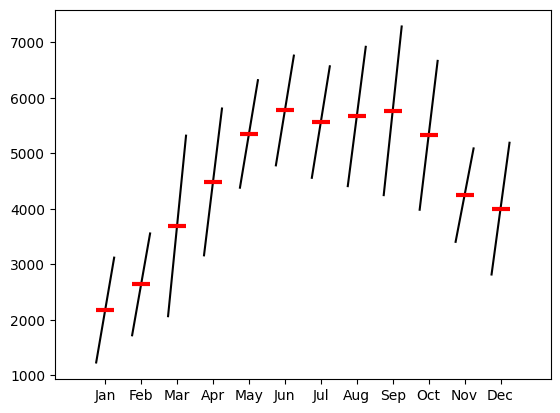

In [23]:
month_plot(df_temp['y'].resample('ME').mean())
plt.show()

<ipython-input-24-d2f2240ff7b4>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean())


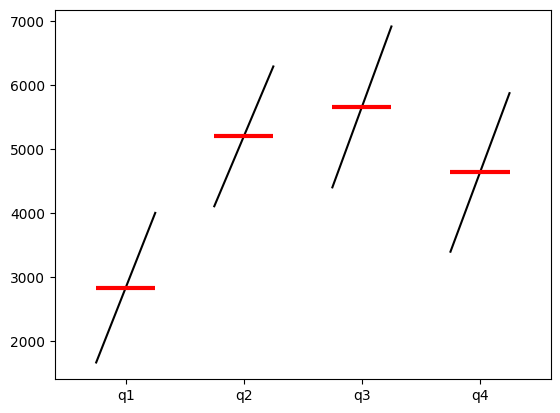

In [24]:
quarter_plot(df_temp['y'].resample('Q').mean())
plt.show()

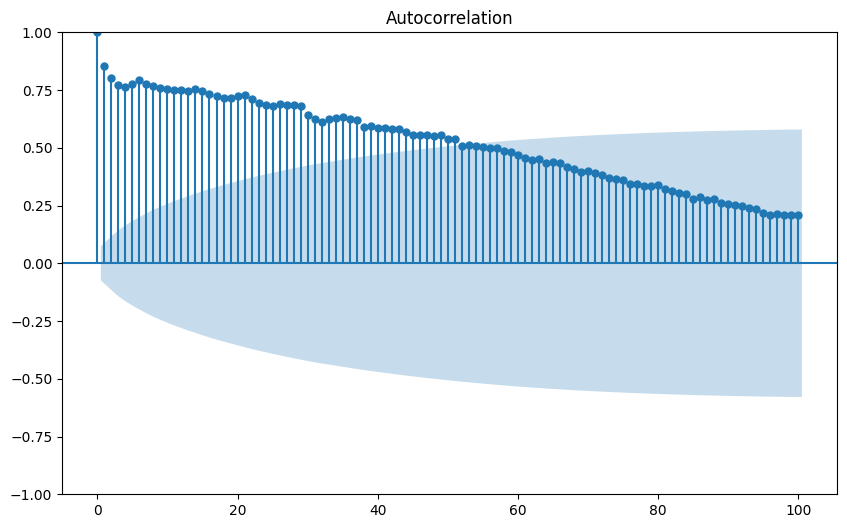

In [28]:
fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df_temp['y'], lags = 100, ax = ax)
plt.show()

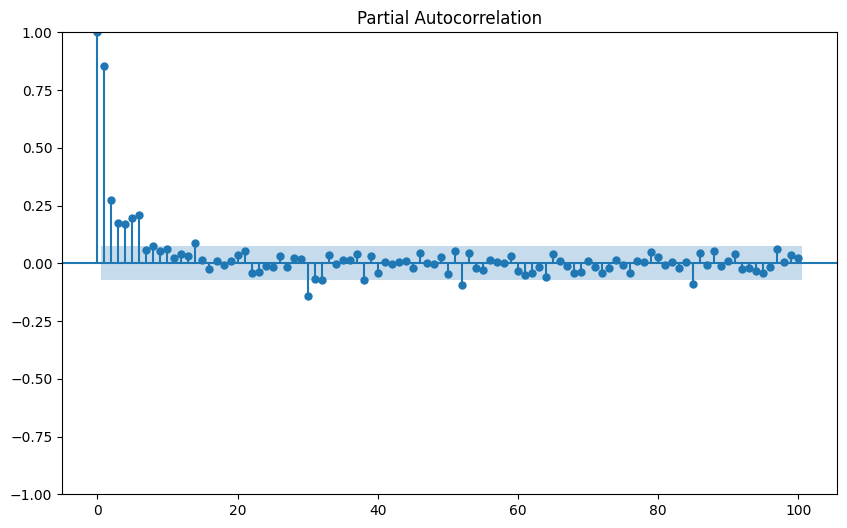

In [29]:
fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df_temp['y'], lags = 100, ax = ax)
plt.show()

In [30]:
df.head(0)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weather_2,weather_3


In [32]:
df[df.holiday==1].ds#getting all the holidays

,ds
16,2011-01-17
51,2011-02-21
104,2011-04-15
149,2011-05-30
184,2011-07-04
247,2011-09-05
282,2011-10-10
314,2011-11-11
327,2011-11-24
359,2011-12-26


In [55]:
gen_holidays = pd.DataFrame({'holiday':'gen_holiday',
                             'ds':df[df.holiday==1].ds,
                             'lower_window':-2,
                      'upper_window':2})
#adding the modre predicative powerd data
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [56]:
holidays = pd.concat([gen_holidays,xmas,nye,easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holiday,2011-01-17,-2,2
51,gen_holiday,2011-02-21,-2,2
104,gen_holiday,2011-04-15,-2,2
149,gen_holiday,2011-05-30,-2,2
184,gen_holiday,2011-07-04,-2,2
247,gen_holiday,2011-09-05,-2,2
282,gen_holiday,2011-10-10,-2,2
314,gen_holiday,2011-11-11,-2,2
327,gen_holiday,2011-11-24,-2,2
359,gen_holiday,2011-12-26,-2,2


In [42]:
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)  # Create lagged values for 'temp'
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)  # Create lagged values for 'atemp'

df.head(10)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weather_2,weather_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN
5,2011-01-06,0,1,1,0.204348,0.233209,0.518261,0.089565,1606,False,False,0.226957,0.229270,0.196364,0.189405,0.344167,0.363625,NaN,NaN
6,2011-01-07,0,1,2,0.196522,0.208839,0.498696,0.168726,1510,True,False,0.204348,0.233209,0.200000,0.212122,0.363478,0.353739,NaN,NaN
7,2011-01-08,0,0,2,0.165000,0.162254,0.535833,0.266804,959,True,False,0.196522,0.208839,0.226957,0.229270,0.196364,0.189405,0.344167,0.363625
8,2011-01-09,0,0,1,0.138333,0.116175,0.434167,0.361950,822,False,False,0.165000,0.162254,0.204348,0.233209,0.200000,0.212122,0.363478,0.353739
9,2011-01-10,0,1,1,0.150833,0.150888,0.482917,0.223267,1321,False,False,0.138333,0.116175,0.196522,0.208839,0.226957,0.229270,0.196364,0.189405


<Axes: >

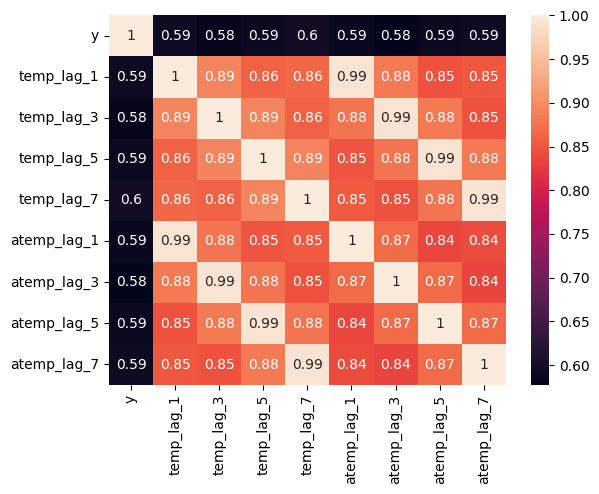

In [45]:
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
import seaborn as sns
sns.heatmap(df[columns].corr(),annot=True)

In [46]:
df = df.iloc[:,:-7]
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weather_2,weather_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


In [47]:
df = df.dropna()

In [48]:
from prophet import Prophet

In [57]:
holidays

,holiday,ds,lower_window,upper_window
16,gen_holiday,2011-01-17,-2,2
51,gen_holiday,2011-02-21,-2,2
104,gen_holiday,2011-04-15,-2,2
149,gen_holiday,2011-05-30,-2,2
184,gen_holiday,2011-07-04,-2,2
247,gen_holiday,2011-09-05,-2,2
282,gen_holiday,2011-10-10,-2,2
314,gen_holiday,2011-11-11,-2,2
327,gen_holiday,2011-11-24,-2,2
359,gen_holiday,2011-12-26,-2,2


In [61]:
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=holidays,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10,
    holidays_prior_scale=10,
    changepoint_prior_scale=0.05
)
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weather_2")  # Weather situation category 2
m.add_regressor("weather_3")  # Weather situation category 3
m.add_regressor("temp_lag_1")


In [62]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/_3fr_9ux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/4iamaca1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16684', 'data', 'file=/tmp/tmpm1nsm6sm/_3fr_9ux.json', 'init=/tmp/tmpm1nsm6sm/4iamaca1.json', 'output', 'file=/tmp/tmpm1nsm6sm/prophet_modelqsq11frj/prophet_model-20250424190924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [63]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)# getting the coefficents and we need to iterpret them

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.448230,0.448230,0.448230
1,temp,multiplicative,0.502959,1.188668,1.188668,1.188668
2,atemp,multiplicative,0.481015,0.342352,0.342352,0.342352
3,hum,multiplicative,0.625459,-0.415851,-0.415851,-0.415851
4,windspeed,multiplicative,0.190577,-0.590206,-0.590206,-0.590206
5,weather_2,multiplicative,0.000000,-0.115913,-0.115913,-0.115913
6,weather_3,multiplicative,0.000000,-0.469911,-0.469911,-0.469911
7,temp_lag_1,multiplicative,0.503024,-0.571821,-0.571821,-0.571821


In [64]:
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 44.82% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 118.87% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 34.24% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 41.59% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 59.02% (multiplicatively).
For each unit increase in weather_2, the target variable is expected to decrease by 11.59% (multiplicatively).
For each unit increase in weather_3, the target variable is expected to decrease by 46.99% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 57.18% (multiplicatively).


In [65]:
from prophet.diagnostics import cross_validation


In [66]:
#we gonna start our rolling winow from the lates 6 months
df.shape[0]-180

520

In [71]:
#520 is where we start
df_cv = cross_validation(
    model =m,
    period = '15 days',
    initial = '521 days',
    horizon = '30 days',
    parallel = 'processes'
)

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7e068665e810>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/0or2kch9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/7kcbnqse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/8u2kugo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5028', 'data', 'file=/tmp/tmpm1nsm6sm/7kcbnqse.json', 'init=/tmp/tmpm1nsm6sm/8u2kugo1.json', 'output', 'file=/tmp/tmpm1nsm6sm/prophet_modelix66tfwk/prophet_model-20250424191752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/lai4r9zk.json
DEB

In [79]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8218.107965,7521.480897,8921.941544,6211,2012-06-19
1,2012-06-21,8517.636438,7806.088059,9191.277386,5905,2012-06-19
2,2012-06-22,8155.284540,7462.455725,8880.930834,5823,2012-06-19
3,2012-06-23,7738.209754,6992.121889,8407.972230,7458,2012-06-19
4,2012-06-24,7891.994019,7168.283119,8592.825707,6891,2012-06-19


In [80]:
from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.591031e+06,1261.360842,1000.132174,0.174698,0.124849,0.166258,0.533333
1,4 days,1.426143e+06,1194.212092,934.742984,0.156520,0.116548,0.151778,0.533333
2,5 days,1.471865e+06,1213.204488,966.709165,0.157546,0.110663,0.153219,0.466667
3,6 days,1.146910e+06,1070.938755,852.419013,0.132846,0.089614,0.134467,0.533333
4,7 days,1.236445e+06,1111.955466,868.194133,0.131164,0.089614,0.136146,0.533333
5,8 days,1.001902e+06,1000.950416,764.596263,0.107564,0.087141,0.115711,0.600000
6,9 days,9.584884e+05,979.024188,763.311539,0.107518,0.093548,0.114192,0.566667
7,10 days,1.401179e+06,1183.713884,888.127403,0.128911,0.096708,0.131643,0.533333
8,11 days,1.492019e+06,1221.482273,908.185192,0.135645,0.096017,0.136172,0.566667
9,12 days,1.925474e+06,1387.614608,1072.709699,0.168293,0.115892,0.171555,0.466667


In [81]:
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1263.0
The MAPE is 15.94 %


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


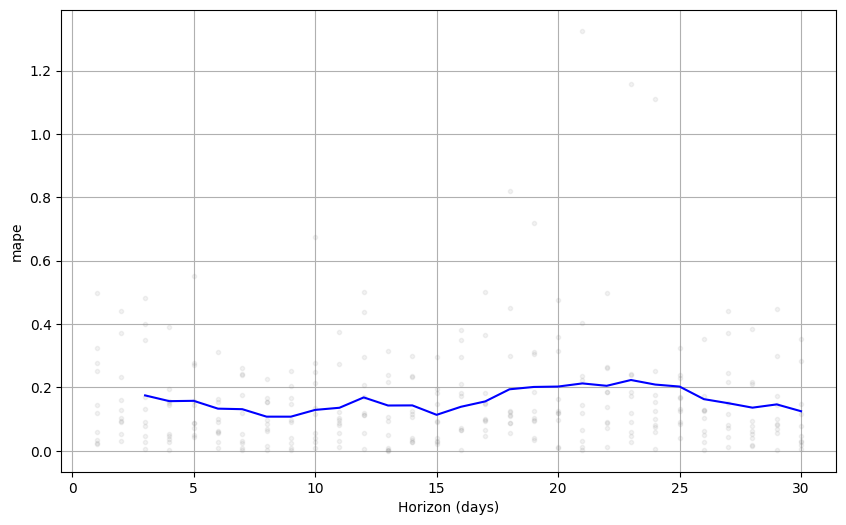

In [82]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

In [83]:
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
# the percentage deviation of predicted from actual values
df_cv['deviation_%'] = (df_cv['yhat'] / df_cv['y'] - 1) *100

In [84]:
df_cv.sort_values(by = 'deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
290,2012-11-22,5640.385320,4823.474425,6424.506274,2425,2012-11-01,3215.385320,132.593209
292,2012-11-24,4910.404855,4142.422454,5677.015350,2277,2012-11-01,2633.404855,115.652387
293,2012-11-25,5112.630094,4307.714255,5888.403777,2424,2012-11-01,2688.630094,110.917083
17,2012-07-07,8801.463540,8133.271879,9546.296405,4840,2012-06-19,3961.463540,81.848420
18,2012-07-08,8028.202612,7303.480873,8741.556944,4672,2012-06-19,3356.202612,71.836529
9,2012-06-29,9149.309455,8426.091241,9815.885632,5463,2012-06-19,3686.309455,67.477749
214,2012-10-07,5445.510588,4639.114158,6177.491831,3510,2012-10-02,1935.510588,55.142752
11,2012-07-01,8310.676003,7623.172087,8974.631252,5531,2012-06-19,2779.676003,50.256301
180,2012-09-18,6097.813793,5353.205395,6916.227836,4073,2012-09-17,2024.813793,49.713081
291,2012-11-23,5852.414424,5072.709470,6646.290724,3910,2012-11-01,1942.414424,49.678118


In [85]:
df_cv.sort_values(by = 'deviation', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
47,2012-07-22,4063.253564,3367.804644,4838.414231,7410,2012-07-04,-3346.746436,-45.165269
50,2012-07-25,4868.367144,4145.916417,5631.595478,8173,2012-07-04,-3304.632856,-40.433535
88,2012-08-17,3949.130423,3178.132008,4731.791400,7148,2012-07-19,-3198.869577,-44.751953
57,2012-08-01,4658.712265,3933.153278,5368.640651,7580,2012-07-04,-2921.287735,-38.539416
49,2012-07-24,4872.798143,4155.197715,5562.064071,7592,2012-07-04,-2719.201857,-35.816674
56,2012-07-31,4541.725622,3745.439967,5206.257260,7216,2012-07-04,-2674.274378,-37.060343
62,2012-07-22,4826.152533,4057.776278,5624.066952,7410,2012-07-19,-2583.847467,-34.869736
65,2012-07-25,5616.674595,4877.418020,6370.557059,8173,2012-07-19,-2556.325405,-31.277688
59,2012-08-03,4647.860766,3918.387034,5381.390148,7175,2012-07-04,-2527.139234,-35.221453
55,2012-07-30,4607.460504,3871.729899,5336.886948,7105,2012-07-04,-2497.539496,-35.151858


In [86]:
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [89]:
all_params = list(ParameterGrid(param_grid))
len(all_params)
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [91]:
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
      yearly_seasonality=True,
      weekly_seasonality= True,
      holidays = holidays,
      **params)
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weather_2")
  m.add_regressor("weather_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')


  # Compute and Store the Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/gm1bgetd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/smyrpngc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36476', 'data', 'file=/tmp/tmpm1nsm6sm/gm1bgetd.json', 'init=/tmp/tmpm1nsm6sm/smyrpngc.json', 'output', 'file=/tmp/tmpm1nsm6sm/prophet_model5d7i1pbf/prophet_model-20250424192714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

In [92]:
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,additive,10,983.910230
1,0.05,10,additive,20,981.874867
2,0.05,10,multiplicative,10,1263.286345
3,0.05,10,multiplicative,20,1263.087048
4,0.05,20,additive,10,982.518742
5,0.05,20,additive,20,981.739288
6,0.05,20,multiplicative,10,1263.027453
7,0.05,20,multiplicative,20,1268.578399
8,0.50,10,additive,10,1139.211725
9,0.50,10,additive,20,1153.066027


In [101]:
best_params = all_params[tuning_results.index(min(tuning_results))]
best_params

{'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 20,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 20}

In [95]:
df_train = pd.read_csv("Daily Bike Sharing training.csv")
# Load the daily bike sharing future data
df_future = pd.read_csv("Daily Bike Sharing future.csv")

# concat both together
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      701 non-null    float64
 14  registered  701 non-null    float64
 15  cnt         701 non-null    float64
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [97]:
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [98]:
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [99]:
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)

# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [100]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,False,False


In [102]:
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False


In [103]:
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [104]:
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's Eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [105]:
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


In [106]:
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN


In [107]:
train = df.iloc[:-30]

In [108]:
train = train.dropna()

In [109]:
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality= True,
    holidays = holidays,
    **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/zw1lf9pt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1nsm6sm/_ynrnbnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91679', 'data', 'file=/tmp/tmpm1nsm6sm/zw1lf9pt.json', 'init=/tmp/tmpm1nsm6sm/_ynrnbnh.json', 'output', 'file=/tmp/tmpm1nsm6sm/prophet_modelaevfazqc/prophet_model-20250424193325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [110]:
future_regressors = df.drop(columns = ['ds', 'y'])
# Drop rows with missing values (NaNs) from future_regressors
future_regressors = future_regressors.dropna()
# Reset the index
future_regressors.reset_index(drop = True, inplace = True)

In [111]:
# Create a future dataframe using Prophet's make_future_dataframe method
future = m.make_future_dataframe(periods = 30)
# Concatenate future dataframe with future_regressors along axis 1 (columns)
future = pd.concat([future, future_regressors], axis = 1)

In [112]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,atemp,atemp_lower,atemp_upper,christmas,christmas_lower,christmas_upper,easter,easter_lower,easter_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,gen_holi,gen_holi_lower,gen_holi_upper,holidays,holidays_lower,holidays_upper,hum,hum_lower,hum_upper,new_years,new_years_lower,new_years_upper,temp,temp_lower,temp_upper,temp_lag_1,temp_lag_1_lower,temp_lag_1_upper,weathersit_2,weathersit_2_lower,weathersit_2_upper,weathersit_3,weathersit_3_lower,weathersit_3_upper,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,2012-12-27,6538.031791,2110.876641,3933.116841,6537.427664,6538.568894,-3539.992092,-3539.992092,-3539.992092,-336.296339,-336.296339,-336.296339,-1567.273898,-1567.273898,-1567.273898,0.0,0.0,0.0,-1068.178859,-1068.178859,-1068.178859,-245.516079,-245.516079,-245.516079,-1812.789977,-1812.789977,-1812.789977,-38.316340,-38.316340,-38.316340,0.000000,0.000000,0.000000,-1051.328179,-1051.328179,-1051.328179,510.008527,510.008527,510.008527,-441.869512,-441.869512,-441.869512,0.0,0.0,0.0,-144.307674,-144.307674,-144.307674,-353.670638,-353.670638,-353.670638,643.293622,643.293622,643.293622,-514.715582,-514.715582,-514.715582,0.0,0.0,0.0,2998.039699
726,2012-12-28,6544.103884,3634.551508,5450.362237,6543.454163,6544.683664,-2024.784118,-2024.784118,-2024.784118,-298.744522,-298.744522,-298.744522,0.000000,0.000000,0.000000,0.0,0.0,0.0,-536.142004,-536.142004,-536.142004,0.000000,0.000000,0.000000,-887.852032,-887.852032,-887.852032,49.482522,49.482522,49.482522,-887.852032,-887.852032,-887.852032,-1054.852442,-1054.852442,-1054.852442,488.731602,488.731602,488.731602,-441.869512,-441.869512,-441.869512,0.0,0.0,0.0,-74.288346,-74.288346,-74.288346,77.816726,77.816726,77.816726,643.293622,643.293622,643.293622,-526.501737,-526.501737,-526.501737,0.0,0.0,0.0,4519.319765
727,2012-12-29,6550.175977,3343.464067,5062.625002,6549.495704,6550.790337,-2381.794412,-2381.794412,-2381.794412,-315.463304,-315.463304,-315.463304,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1352.952903,-1352.952903,-1352.952903,0.000000,0.000000,0.000000,-1097.275594,-1097.275594,-1097.275594,-177.863462,-177.863462,-177.863462,-1097.275594,-1097.275594,-1097.275594,-1054.852442,-1054.852442,-1054.852442,490.369497,490.369497,490.369497,-441.869512,-441.869512,-441.869512,0.0,0.0,0.0,606.667666,606.667666,606.667666,146.726319,146.726319,146.726319,0.000000,0.000000,0.000000,-538.233582,-538.233582,-538.233582,0.0,0.0,0.0,4168.381565
728,2012-12-30,6556.248071,3346.171992,5113.247640,6555.510724,6556.912466,-2314.515325,-2314.515325,-2314.515325,-329.609355,-329.609355,-329.609355,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1040.241859,-1040.241859,-1040.241859,0.000000,0.000000,0.000000,-909.088050,-909.088050,-909.088050,198.333250,198.333250,198.333250,-909.088050,-909.088050,-909.088050,-1044.288105,-1044.288105,-1044.288105,490.369497,490.369497,490.369497,0.000000,0.000000,0.000000,0.0,0.0,0.0,184.385782,184.385782,184.385782,-355.047145,-355.047145,-355.047145,0.000000,0.000000,0.000000,-549.571199,-549.571199,-549.571199,0.0,0.0,0.0,4241.732745
729,2012-12-31,6562.320164,2360.880286,4106.336500,6561.536840,6563.031436,-3315.992289,-3315.992289,-3315.992289,-340.467441,-340.467441,-340.467441,0.000000,0.000000,0.000000,0.0,0.0,0.0,-720.773064,-720.773064,-720.773064,0.000000,0.000000,0.000000,-1749.928052,-1749.928052,-1749.928052,66.925912,66.925912,66.925912,-1749.928052,-1749.928052,-1749.928052,-1213.317484,-1213.317484,-1213.317484,485.459740,485.459740,485.459740,-441.869512,-441.869512,-441.869512,0.0,0.0,0.0,-285.086554,-285.086554,-285.086554,79.202100,79.202100,79.202100,643.293622,643.293622,643.293622,-56

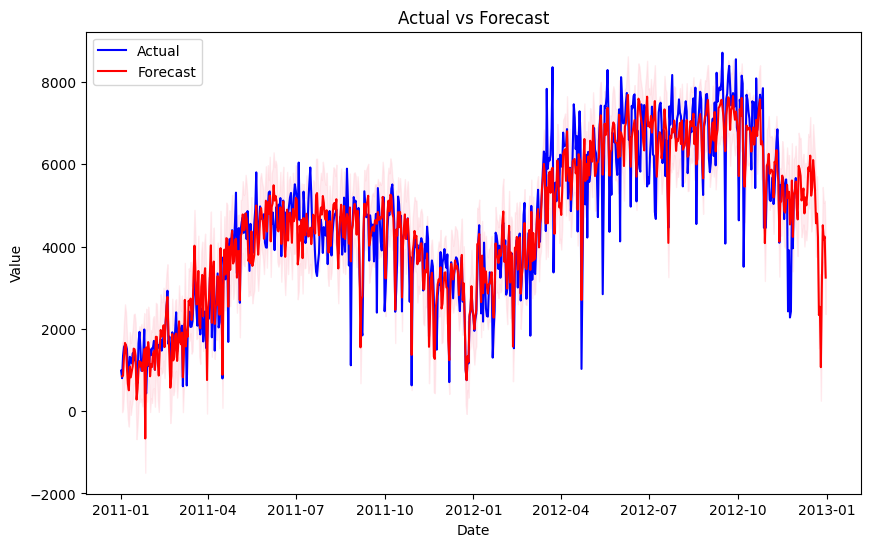

In [113]:
# Visualize time series plot
plt.figure(figsize=(10, 6))
# Plot actual and forecasted values
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
# Fill the uncertainty interval (between yhat_lower and yhat_upper) with a pink color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
# add title, xlabel, ylabel, legend
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

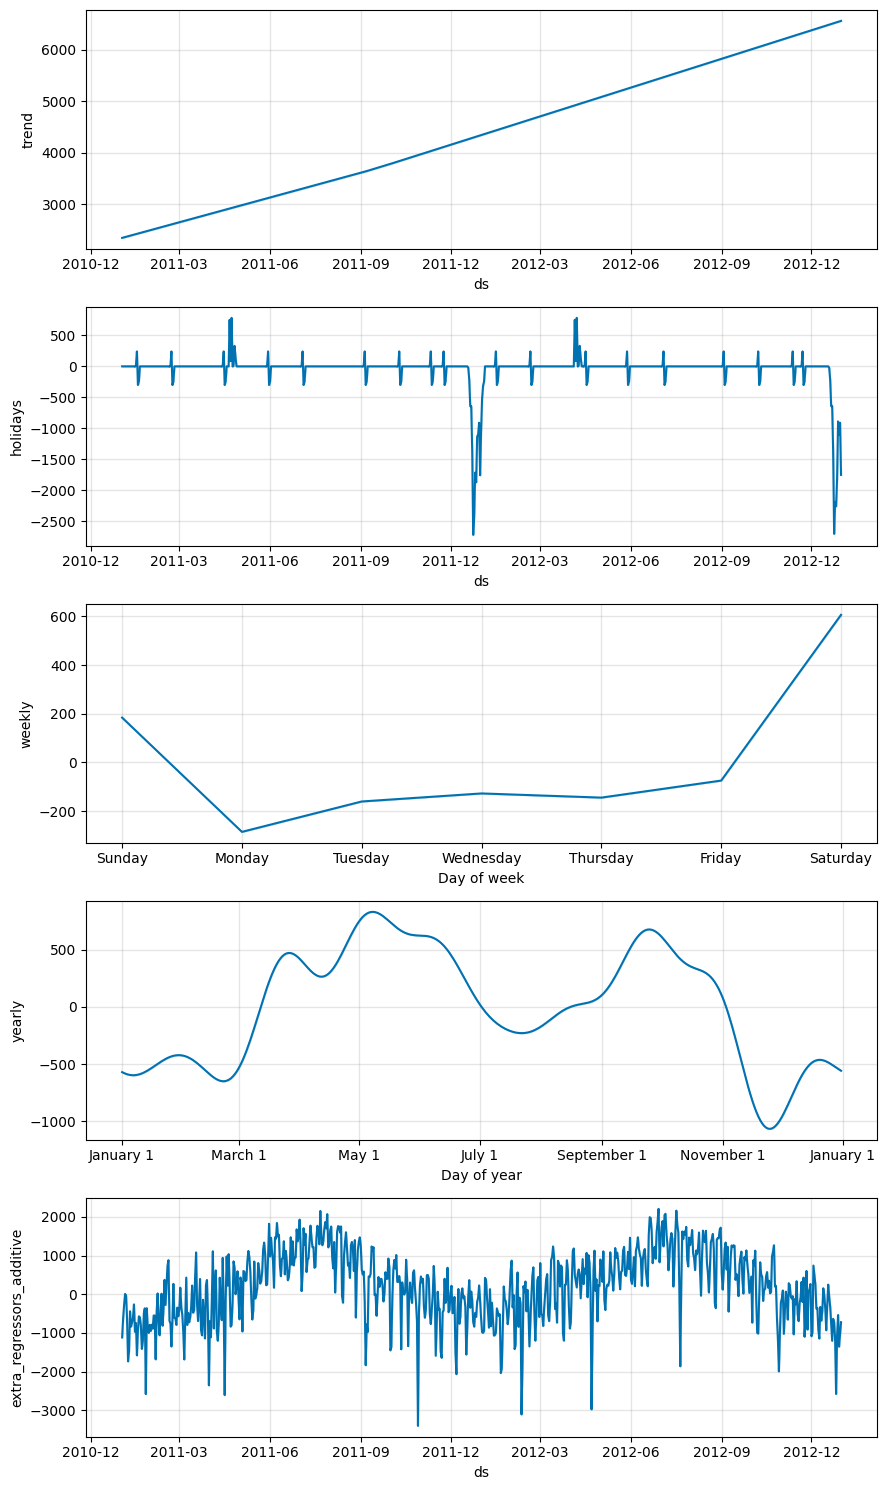

In [114]:
m.plot_components(forecast)
plt.show()

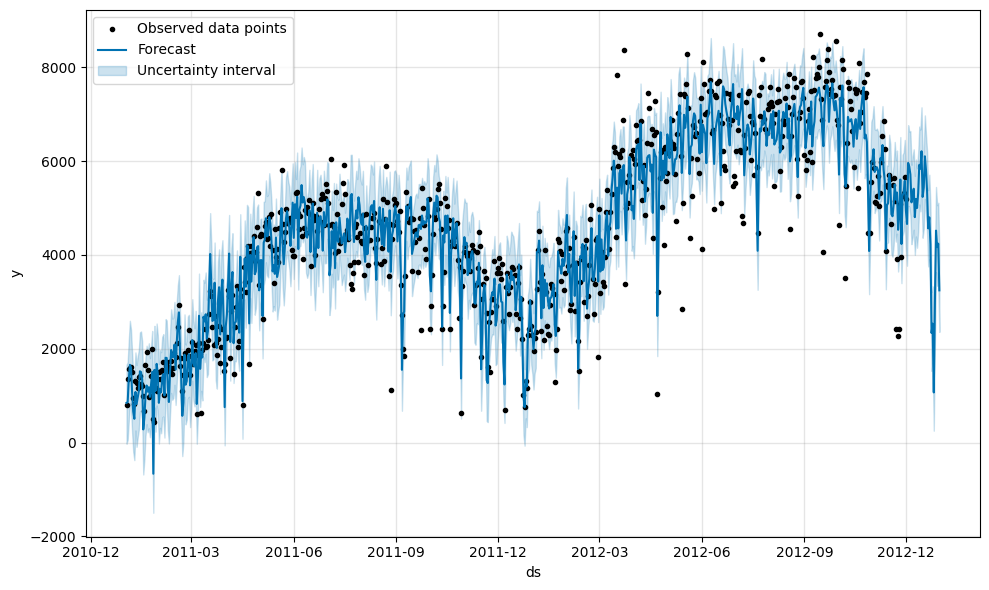

In [115]:
m.plot(forecast)
plt.legend()
plt.show()

In [116]:
# Interactive visualization (using Plotly)
from prophet.plot import plot_plotly
import plotly.offline as py

# Use Prophet's plot_plotly function to generate an interactive plotly figure
fig = plot_plotly(m, forecast)
# Use Plotly's offline mode to display the interactive plotly figure
py.iplot(fig)